#MINST CNN LeNet-5

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# EDA MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 1s 0us/step


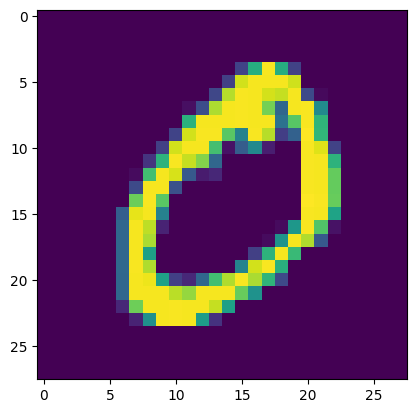

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images [1])

In [ ]:
#LeNet-5 model
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 25s 26ms/step - loss: 0.2716 - accuracy: 0.9153 - val_loss: 0.0779 - val_accuracy: 0.9802
Epoch 2/10
844/844 [==============================] - 21s 25ms/step - loss: 0.0819 - accuracy: 0.9742 - val_loss: 0.0559 - val_accuracy: 0.9858
Epoch 3/10
844/844 [==============================] - 21s 25ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.0522 - val_accuracy: 0.9858
Epoch 4/10
844/844 [==============================] - 20s 24ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0484 - val_accuracy: 0.9870
Epoch 5/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0472 - val_accuracy: 0.9863
Epoch 6/10
844/844 [==============================] - 21s 25ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.0446 - val_accuracy: 0.9875
Epoch 7/10
844/844 [==============================] - 21s 25ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0458 - val_accuracy:

In [ ]:
# Results
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0504 - accuracy: 0.9860
Test Accuracy: 98.60%


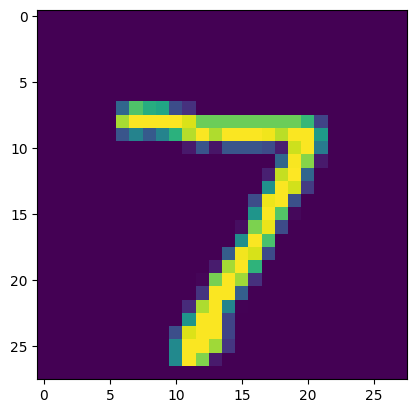

In [ ]:
plt.imshow(test_images[0])

In [ ]:
model.predict(test_images[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 109ms/step


array([7])

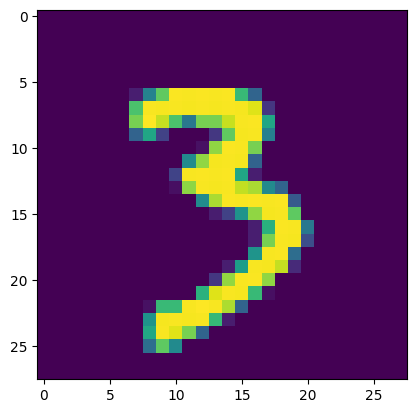

In [ ]:
plt.imshow(test_images[30])

In [ ]:
model.predict(test_images[30].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([3])